In [51]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import imageio

from matplotlib.path import Path
import matplotlib.patches as patches

mpl.rcParams['figure.dpi'] = 300

# Control example

In [119]:
image_2_slice_8 = imageio.v3.imread("Image_2_slice 8.tif")
image_2_slice_31 = imageio.v3.imread("Image_2_slice 31.tif")
image_2_slice_52 = imageio.v3.imread("Image_2_slice 52.tif")
image_2_slice_80 = imageio.v3.imread("Image_2_slice 80.tif")

In [121]:
image_2_slice_8.shape

(154, 197)

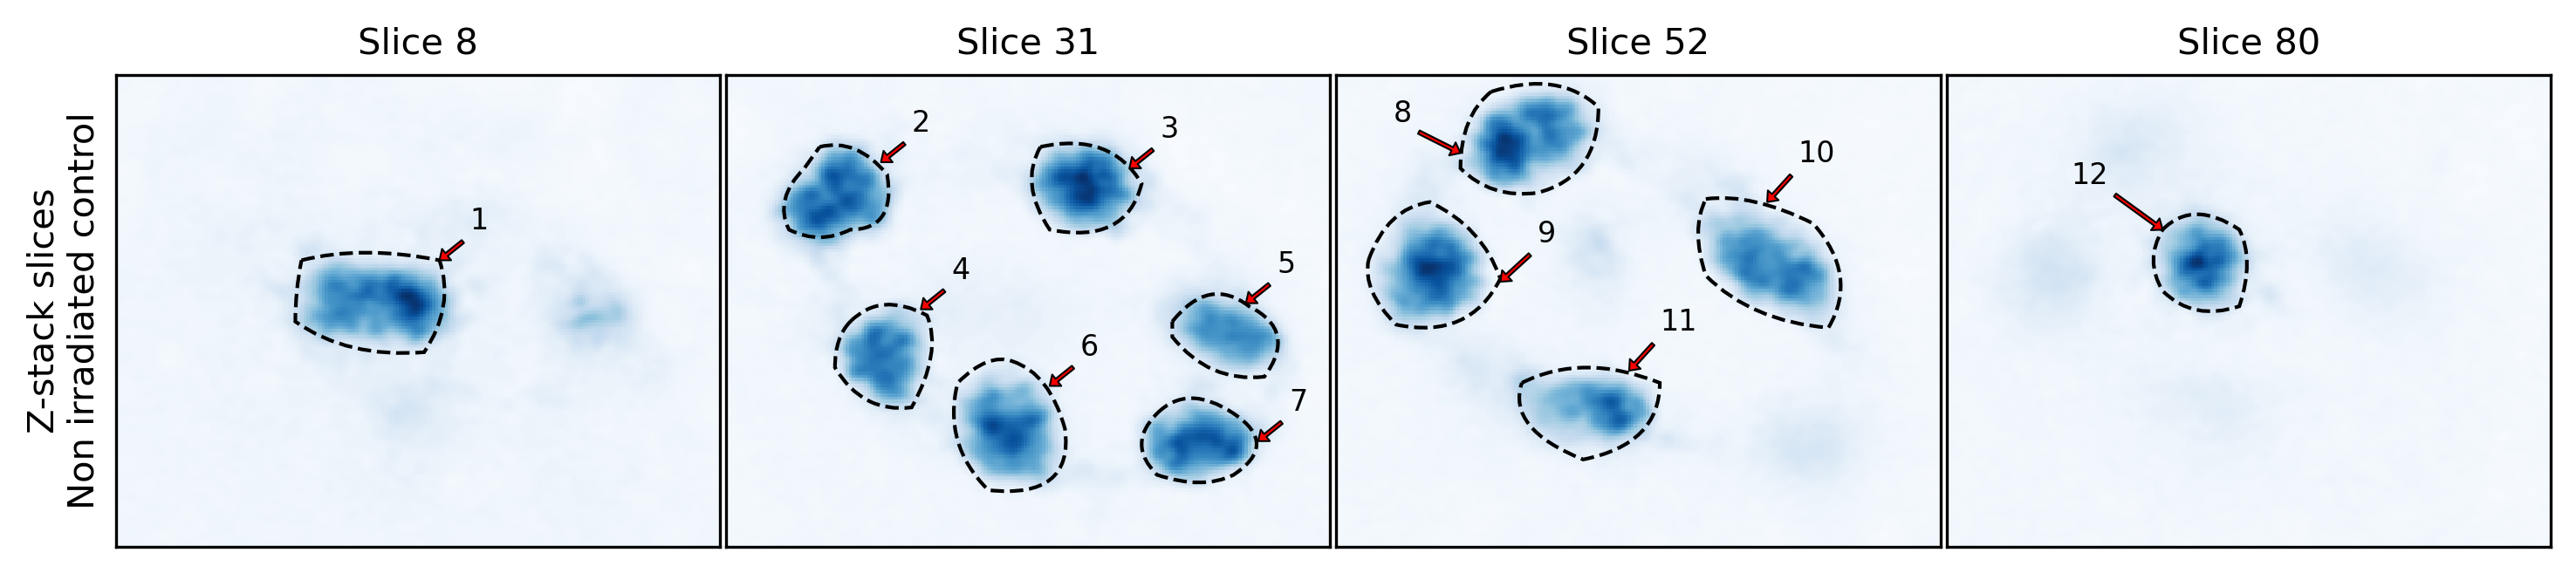

In [210]:
def draw_annots(ax, annotations) :
    for an in annotations :
        ax.annotate(
            an[0], xy=an[1], xycoords='data', xytext=an[2], fontsize=8,
            arrowprops=dict(width=1.0, headwidth=4.0, frac=0.05, lw=0.5, fc="r", ec="k", headlength=2.5)
        )
    
def draw_paths(ax, paths) :
    for p in paths :
        x_points = []
        y_points = []
        for vertex in p["vert"] :
            x_points.append(vertex[0])
            y_points.append(vertex[1])

        path = Path(p["vert"], [Path.MOVETO]+[Path.CURVE3 for _ in p["vert"][1:-1]]+[Path.LINETO])
        patch = patches.PathPatch(path, facecolor='none', lw=1, linestyle="dashed")
        ax.add_patch(patch)
        
        if p["show_dots"] :
            ax.scatter(x_points, y_points, marker="o", lw=0.25, s=5, facecolor="orange")
            num = 0
            for xt,yt in zip(x_points, y_points) :
                ax.text(s=str(num), x=xt, y=yt, ha="center", va="center", fontsize=4)
                num += 1

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))

ax = axs[0]
ax.imshow(image_2_slice_8, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 8", fontsize=10)
annotations = [
    ["1", (105, 60), (115, 50)], # name, xy head, xy tail
]
paths = [
    {"vert":[(60,60),(80,55),(105,60),(110,75),(100,90),(75,92),(58,80),(58,70),(60,60)], "show_dots":False,},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

ax = axs[1]
ax.imshow(image_2_slice_31, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 31", fontsize=10)
annotations = [
    ["2", (50, 28), (60, 18)], # name, xy head, xy tail
    ["3", (131, 30), (141, 20)],
    ["4", (63, 76), (73, 66)], # name, xy head, xy tail
    ["5", (169, 74), (179, 64)],
    ["6", (105, 101), (115, 91)],
    ["7", (173, 119), (183, 109)],
]
paths = [
    {"vert":[(30,23),(42,20),(52,32),(55,50),(40,50),(30,55),(20,50),(15,40),(25,30),(30,23)], "show_dots":False,},
    {"vert":[(102,23),(125,18),(135,35),(130,55),(105,50),(95,35),(102,23)], "show_dots":False,},
    {"vert":[(40,80),(50,70),(65,78),(70,90),(60,108),(44,110),(35,95),(35,85),(40,80)], "show_dots":False,},
    {"vert":[(145,80),(157,65),(170,75),(186,83),(175,98),(157,100),(145,85),(145,80)], "show_dots":False,},
    {"vert":[(140,110),(150,100),(165,110),(180,120),(165,130),(155,135),(140,130),(130,120),(140,110)], "show_dots":False,},
    {"vert":[(93,93),(105,97),(110,115),(113,138),(85,135),(70,120),(75,100),(85,90),(93,93)], "show_dots":False,},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

ax = axs[2]
ax.imshow(image_2_slice_52, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 52", fontsize=10)
annotations = [
    ["8", (40, 25), (18, 15)], # name, xy head, xy tail
    ["9", (53, 67), (65, 54)],
    ["10", (140, 41), (150, 28)],
    ["11", (95, 96), (105, 83)],
]
paths = [
    {"vert":[(50,5),(72,-2),(85,10),(85,33),(65,38),(50,40),(40,30),(40,13),(50,5)], "show_dots":False,},
    {"vert":[(10,60),(16,43),(30,41),(47,49),(53,66),(43,86),(19,81),(8,70),(10,60)], "show_dots":False,},
    {"vert":[(120,40),(135,38),(155,48),(170,65),(160,82),(135,80),(120,65),(115,50),(120,40)], "show_dots":False,},
    {"vert":[(60,100),(80,90),(105,100),(105,120),(80,125),(55,115),(60,100)], "show_dots":False,},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

ax = axs[3]
ax.imshow(image_2_slice_80, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 80", fontsize=10)
annotations = [
    ["12", (70, 50), (40, 35)], # name, xy head, xy tail
]
paths = [
    {"vert":[(70,50),(80,40),(95,50),(100,60),(95,75),(80,80),(70,70),(64,60),(70,50)], "show_dots":False,},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

fig.subplots_adjust(hspace=0.0, wspace=0.01)

"""
for ax in axs :
    ax.grid(zorder=5, lw=0.25)
    ax.set_xticks(np.arange(0, 197, 20))
    ax.set_yticks(np.arange(0, 154, 20))

    ax.tick_params(labeltop=True, labelright=False, labelbottom=False, top=True, bottom=False, direction="out", labelsize=6)
    ax.tick_params(axis="x", rotation=90)
"""

for ax in axs :
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(length=0)

axs[0].set_ylabel("Z-stack slices\nNon irradiated control")
    
plt.show()

# Irradiated example

In [211]:
image_21_slice_18 = imageio.v3.imread("Image_21_slice_18.tif")
image_21_slice_49 = imageio.v3.imread("Image_21_slice_49.tif")
image_21_slice_86 = imageio.v3.imread("Image_21_slice_86.tif")
image_21_slice_102 = imageio.v3.imread("Image_21_slice_102.tif")

In [212]:
image_21_slice_18.shape

(259, 274)

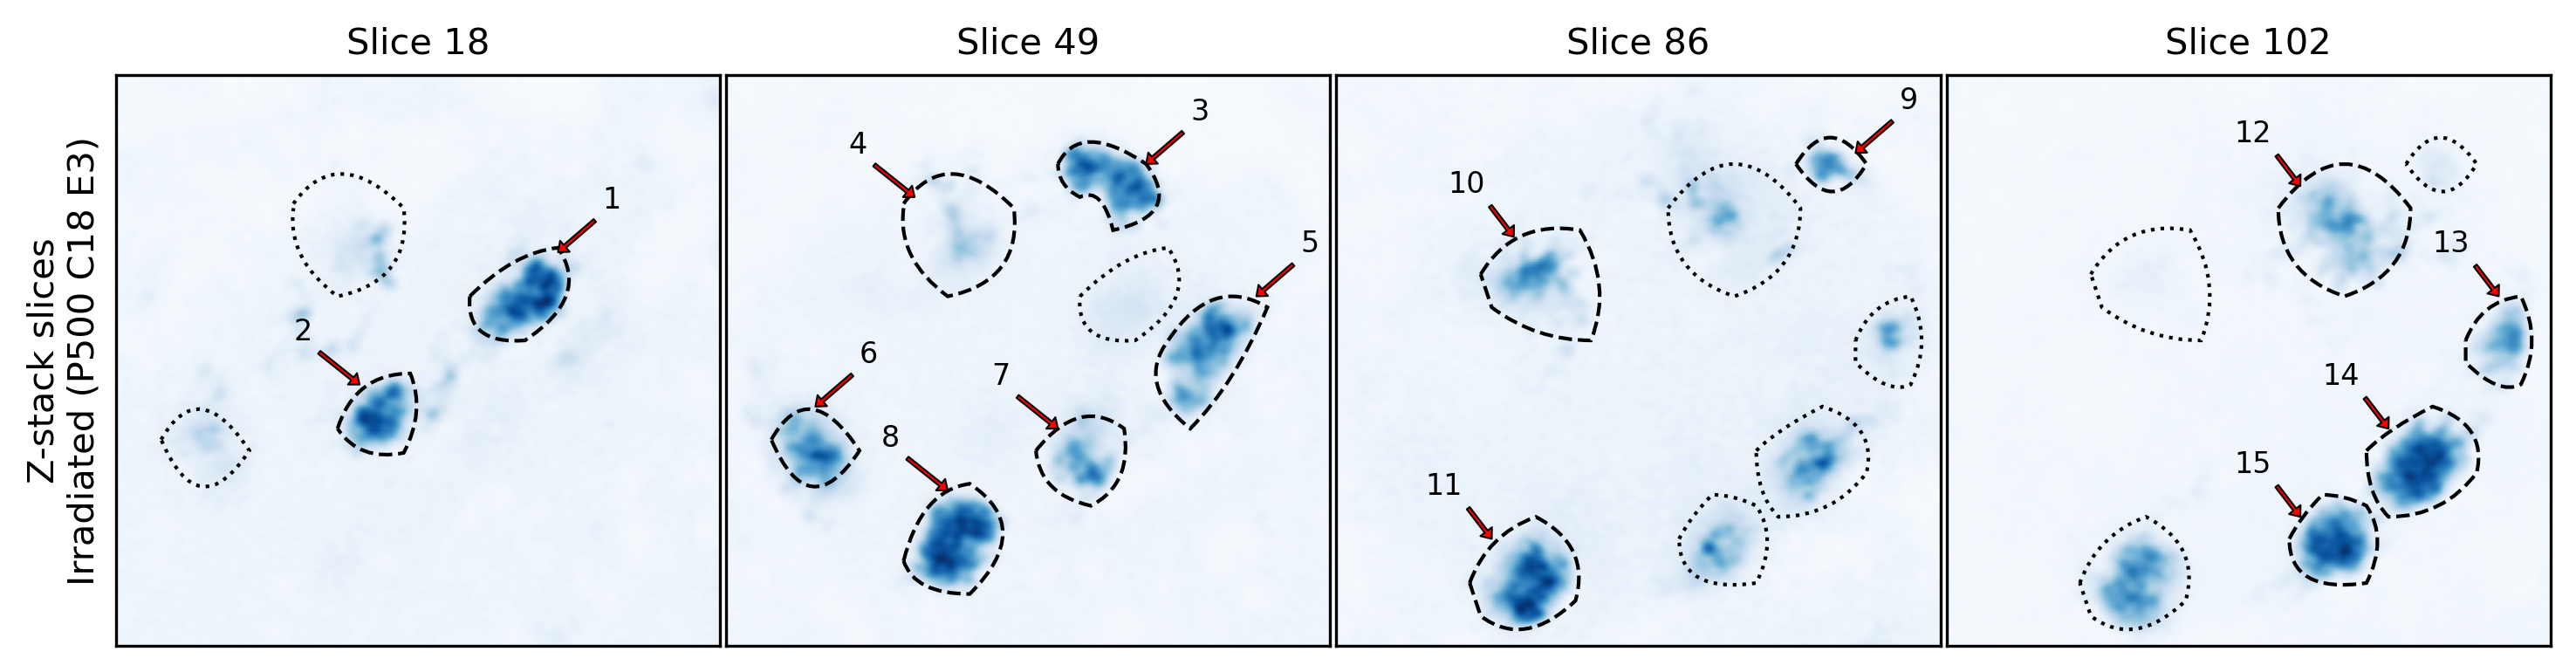

In [278]:
def draw_annots(ax, annotations) :
    for an in annotations :
        ax.annotate(
            an[0], xy=an[1], xycoords='data', xytext=an[2], fontsize=8,
            arrowprops=dict(width=1.0, headwidth=4.0, frac=0.05, lw=0.5, fc="r", ec="k", headlength=2.5)
        )
    
def draw_paths(ax, paths) :
    for p in paths :
        x_points = []
        y_points = []
        for vertex in p["vert"] :
            x_points.append(vertex[0])
            y_points.append(vertex[1])

        path = Path(p["vert"], [Path.MOVETO]+[Path.CURVE3 for _ in p["vert"][1:-1]]+[Path.LINETO])
        linestyle = "dashed" if "style" not in p.keys() else p["style"]
        patch = patches.PathPatch(path, facecolor='none', lw=1, linestyle=linestyle)
        ax.add_patch(patch)
        
        if p["show_dots"] :
            ax.scatter(x_points, y_points, marker="o", lw=0.25, s=5, facecolor="orange")
            num = 0
            for xt,yt in zip(x_points, y_points) :
                ax.text(s=str(num), x=xt, y=yt, ha="center", va="center", fontsize=4)
                num += 1

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,3.5))

ax = axs[0]
ax.imshow(image_21_slice_18, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 18", fontsize=10)

annotations = [
    ["1", (200, 80), (220, 60)], # name, xy head, xy tail
    ["2", (110, 140), (80, 120)],
]
paths = [
    {"vert":[(160,100),(180,80),(200,78),(215,100),(185,120),(158,122),(160,100)], "show_dots":False,},
    {"vert":[(100,160),(108,135),(133,135),(140,152),(130,171),(110,175),(100,160)], "show_dots":False,},
    {"vert":[(80,58),(100,30),(130,60),(134,93),(100,100),(77,83),(80,60)], "show_dots":False, "style":"dotted"},
    {"vert":[(20,165),(37,135),(60,170),(37,205),(20,165)], "show_dots":False, "style":"dotted"},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)


ax = axs[1]
ax.imshow(image_21_slice_49, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 49", fontsize=10)

annotations = [
    ["3", (190, 40), (210, 20)],
    ["4", (85, 55), (55, 35)],
    ["5", (240, 100), (260, 80)],
    ["6", (40, 150), (60, 130)],
    ["7", (150, 160), (120, 140)],
    ["8", (100, 188), (70, 168)],
]
paths = [
    {"vert":[(80,58),(100,30),(130,60),(134,93),(100,100),(77,83),(80,60)], "show_dots":False},
    {"vert":[(150,40),(160,20),(190,40),(207,63),(175,70),(170,50),(160,55),(150,50),(150,40)], "show_dots":False},
    {"vert":[(200,120),(220,90),(245,105),(230,140),(210,160),(185,140),(200,120)], "show_dots":False},
    {"vert":[(20,165),(37,135),(60,170),(37,205),(20,165)], "show_dots":False},
    {"vert":[(80,220),(88,188),(110,185),(140,205),(110,235),(85,235),(80,220)], "show_dots":False},
    {"vert":[(140,170),(160,145),(180,160),(184,185),(165,195),(142,190),(140,170)], "show_dots":False},
    {"vert":[(160,100),(180,80),(200,78),(215,100),(185,120),(158,122),(160,100)], "show_dots":False, "style":"dotted"},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

ax = axs[2]
ax.imshow(image_21_slice_86, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 86", fontsize=10)

annotations = [
    ["9", (235, 35), (255, 15)],
    ["10", (80, 73), (50, 53)],
    ["11", (70, 210), (40, 190)],
]
paths = [
    {"vert":[(60,230),(68,208),(90,200),(115,213),(108,238),(85,260),(65,245),(60,230)], "show_dots":False},
    {"vert":[(65,90),(80,65),(110,70),(125,95),(115,120),(90,120),(70,105),(65,90)], "show_dots":False},
    {"vert":[(208,40),(223,16),(240,40),(225,65),(208,40)], "show_dots":False},
    
    {"vert":[(150,60),(180,20),(210,60),(210,90),(180,100),(150,90),(150,60)], "show_dots":False, "style":"dotted"},
    {"vert":[(235,120),(242,102),(260,100),(270,120),(260,140),(250,145),(235,130),(235,120)], "show_dots":False, "style":"dotted"},
    {"vert":[(190,170),(200,160),(220,150),(245,158),(240,180),(225,200),(200,200),(190,190),(190,170)], "show_dots":False, "style":"dotted"},
    {"vert":[(155,210),(160,200),(170,190),(180,190),(190,195),(200,210),(190,230),(155,235),(155,210)], "show_dots":False, "style":"dotted"},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

ax = axs[3]
ax.imshow(image_21_slice_102, cmap=plt.cm.Blues, zorder=1)
ax.set_title("Slice 102", fontsize=10)

annotations = [
    ["12", (160, 50), (130, 30)],
    ["13", (250, 100), (220, 80)],
    ["14", (200, 160), (170, 140)],
    ["15", (160, 200), (130, 180)],
]
paths = [
    {"vert":[(150,60),(180,20),(210,60),(210,90),(180,100),(150,90),(150,60)], "show_dots":False},
    {"vert":[(235,120),(242,102),(260,100),(270,120),(260,140),(250,145),(235,130),(235,120)], "show_dots":False},
    {"vert":[(190,170),(200,160),(220,150),(245,158),(240,180),(225,200),(200,200),(190,190),(190,170)], "show_dots":False},
    {"vert":[(155,210),(160,200),(170,190),(180,190),(190,195),(200,210),(190,230),(155,235),(155,210)], "show_dots":False},
    
    {"vert":[(60,230),(68,208),(90,200),(115,213),(108,238),(85,260),(65,245),(60,230)], "show_dots":False, "style":"dotted"},
    {"vert":[(65,90),(80,65),(110,70),(125,95),(115,120),(90,120),(70,105),(65,90)], "show_dots":False, "style":"dotted"},
    {"vert":[(208,40),(223,16),(240,40),(225,65),(208,40)], "show_dots":False, "style":"dotted"},
]
draw_annots(ax, annotations)
draw_paths(ax, paths)

#fig.subplots_adjust(hspace=0.0, wspace=0.01)
"""
for ax in axs :
    ax.set_xticks(np.arange(0, 274, 20), minor=False)
    ax.set_yticks(np.arange(0, 259, 20), minor=False)
    ax.set_xticks(np.arange(10, 274, 20), minor=True)
    ax.set_yticks(np.arange(10, 259, 20), minor=True)
    
    ax.grid(zorder=5, lw=0.3, which="major")
    ax.grid(zorder=2, lw=0.15, which="minor")
    
    ax.tick_params(labeltop=True, labelright=False, labelbottom=False, top=True, bottom=False, direction="out", labelsize=6)
    ax.tick_params(axis="x", rotation=90)
"""

for ax in axs :
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(length=0)

fig.subplots_adjust(hspace=0.0, wspace=0.01)

axs[0].set_ylabel("Z-stack slices\nIrradiated (P500 C18 E3)")
    
plt.show()

annotations = [
    ["9", (235, 35), (255, 15)],
    ["10", (80, 73), (50, 53)],
    ["11", (70, 210), (40, 190)],
    
    ["12", (160, 50), (130, 30)],
    ["13", (250, 100), (220, 80)],
    ["14", (200, 160), (170, 140)],
    ["15", (160, 200), (130, 180)],
]